# DOHMH MenuStat Historical

* [data.cityofnewyork.us](https://data.cityofnewyork.us/Health/DOHMH-MenuStat-Historical-/qgc5-ecnb)


* [menustat.org](https://www.menustat.org/data.html)
* [Dataset](https://data.cityofnewyork.us/api/views/qgc5-ecnb/rows.csv?date=20231011&accessType=DOWNLOAD) (auto-download)</br>
* [Data Dictionary](https://data.cityofnewyork.us/api/views/qgc5-ecnb/files/a809c011-fd64-46ef-8b6c-fdfaa9a8148c?download=true&filename=DOHMH_MenuStat_DD.xlsx) (auto-download)

* x[Question Matrix]()</br>
* x[Questionnaire]()</br>
* x[Codebook]()</br>


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# pd.options.display.float_format = "{:,.0f}".format
%matplotlib inline

In [2]:
df = pd.read_csv("DOHMH_MenuStat__Historical__20231011.csv", low_memory=False)

In [16]:
df.iloc[:5,:20]

,Menu_Item_ID,Year,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,Carbohydrates
0,35005,2017,7 Eleven Mocha Iced Coffee,7 Eleven,1,Mocha Iced Coffee,"Mocha Iced Coffee, Chillers Iced Coffee, Drinks",Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35008,2017,7 Eleven French Vanilla Iced Coffee,7 Eleven,1,French Vanilla Iced Coffee,"French Vanilla Iced Coffee, Chillers Iced Coff...",Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35027,2017,7 Eleven French Vanilla Cappuccino,7 Eleven,1,French Vanilla Cappuccino,"French Vanilla Cappuccino, Coffee, Drinks, Fla...",Beverages,8,NaN,fl oz,NaN,190,6,6,0,0,190,NaN,34
3,35028,2017,7 Eleven Peppermint Mocha,7 Eleven,1,Peppermint Mocha,"Peppermint Mocha, Coffee, 8 fl oz",Beverages,8,NaN,fl oz,NaN,180,4,4,0,0,180,NaN,36
4,35029,2017,7 Eleven Pumpkin Spice Latte,7 Eleven,1,Pumpkin Spice Latte,"Pumpkin Spice Latte, Coffee, 8 fl oz",Beverages,8,NaN,fl oz,NaN,190,6,6,0,0,190,NaN,35


In [21]:
# df.iloc[:5,20:40]

In [22]:
# df.iloc[:5,40:]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65219 entries, 0 to 65218
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu_Item_ID            65219 non-null  int64  
 1   Year                    65219 non-null  int64  
 2   Restaurant_Item_Name    65219 non-null  object 
 3   restaurant              65219 non-null  object 
 4   Restaurant_ID           65219 non-null  int64  
 5   Item_Name               65219 non-null  object 
 6   Item_Description        65219 non-null  object 
 7   Food_Category           65219 non-null  object 
 8   Serving_Size            26899 non-null  float64
 9   Serving_Size_text       39 non-null     object 
 10  Serving_Size_Unit       26927 non-null  object 
 11  Serving_Size_household  15238 non-null  object 
 12  Calories                55315 non-null  float64
 13  Total_Fat               54846 non-null  float64
 14  Saturated_Fat           54143 non-null

In [38]:
df.isnull().sum()

In [24]:
df.describe()

,Menu_Item_ID,Year,Restaurant_ID,Serving_Size,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,...,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g,Kids_Meal,Limited_Time_Offer,Regional,Shareable
count,"65,219","65,219","65,219","26,899","55,315","54,846","54,143","51,503","53,219","54,991",...,"25,853",623,"25,592","25,531","25,207","25,391","65,219","65,219","65,219","65,219"
mean,"103,164","2,017",53,92,380,17,6,0,57,687,...,292,134,15,5,8,1,0,0,0,0
std,"60,360",0,27,173,421,25,13,11,105,"1,064",...,"1,448",120,20,7,16,3,0,0,0,0
min,7,"2,017",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,"39,362","2,017",30,12,130,0,0,0,0,80,...,12,37,6,0,1,0,0,0,0,0
50%,"122,345","2,017",56,24,270,9,4,0,20,310,...,60,117,12,2,5,0,0,0,0,0
75%,"156,752","2,018",79,98,500,23,9,0,69,930,...,475,198,19,7,11,1,0,0,0,0
max,"179,840","2,018",94,"3,792","13,960","1,078","2,046","1,470","2,680","41,290",...,"209,000",561,"1,800",425,"1,800",400,1,1,1,1


In [29]:
df.restaurant.nunique()

96

In [39]:
df.restaurant.unique()

In [32]:
df.Year.unique()

array([2017, 2018])

In [28]:
df.Item_Name.nunique()

46995

In [27]:
df.Item_Name.unique()

array(['Mocha Iced Coffee', 'French Vanilla Iced Coffee',
       'French Vanilla Cappuccino', ...,
       'Butter, Regular, for Junior Hot Hoagies',
       'Sweet Black Pepper Bacon Wake Up Wrap', 'Whiskey Smash'],
      dtype=object)

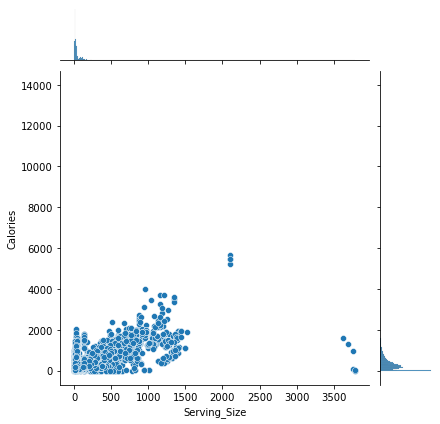

In [69]:
sns.jointplot(data=df, x='Serving_Size', y='Calories', kind='scatter');

In [85]:
# serving size > 1000?
print('serving size nunique:', df.Serving_Size.nunique())
print('serving size unique:', df.Serving_Size.unique())
print('serving size max:', df.Serving_Size.max())

serving size nunique: 1163
serving size unique: [  nan   8.  227.  ... 419.9 700.  547. ]
serving size max: 3792.0


In [90]:
# what are the serving size units?
print('serving size nunique:', df.Serving_Size_Unit.nunique())
print('serving size unique:', df.Serving_Size_Unit.unique())

serving size nunique: 4
serving size unique: [nan 'fl oz' 'g' 'oz' 'ml']


In [115]:
# what items have the most calories?
# df.loc[:, 'Restaurant_Item_Name':'Calories'].sort_values(by='Calories', ascending=False).head(50)
df.loc[:, ['Restaurant_Item_Name',
           'Calories','Serving_Size', 
           'Serving_Size_Unit', 
           'Serving_Size_text',
           'Serving_Size_household']].sort_values(by='Calories', ascending=False).head(50)
# family sized meals are included in items list (in addition to individual servings?)

,Restaurant_Item_Name,Calories,Serving_Size,Serving_Size_Unit,Serving_Size_text,Serving_Size_household
34320,White Castle Crave Crate w/ Any 100 Sliders in...,"13,960",NaN,NaN,NaN,NaN
56976,Dickey's Barbeque Pit Prime Rib,"10,205",NaN,NaN,NaN,7 lb
39870,"Famous Dave's Rib Tips Til Payday, Dinner","9,240",NaN,NaN,NaN,1 order
42004,Dickey's Barbeque Pit Smoked Turkey,"8,213",NaN,NaN,NaN,11 lb
10884,Friendly's Buttermilk Pancakes w/ Pork Sausage...,"8,020",NaN,NaN,NaN,NaN
48320,"Dairy Queen Cookie Dough Blizzard Cake, 10 in","7,560",NaN,NaN,NaN,12-17 Servings
56249,Famous Dave's All American BBQ Feast w/ Georgi...,"7,520",NaN,NaN,NaN,Full order
50593,Famous Dave's All American BBQ Feast w/ Texas ...,"7,480",NaN,NaN,NaN,Full order
48361,Dickey's Barbeque Pit Cajun Fried Turkey,"7,040",NaN,NaN,NaN,11 lb
43128,"Dairy Queen Chocolate Xtreme Blizzard Cake, 10 in","6,940",NaN,NaN,NaN,12-17 Servings


In [112]:
# what are the serving size household?
print('serving size household nunique:', df.Serving_Size_household.nunique())
print('serving size household unique:', df.Serving_Size_household.unique())

serving size household nunique: 815
serving size household unique: [nan '1 Cup' '6 Stix' '12 Pretzels' '8 Pretzels' '1 Packet' '1 Order'
 '5 Stix' '10 Pretzels' 'Small' '2 Slices' 'Regular' '1 Scoop' '2 Scoops'
 'Full Rack' 'Half Rack' '1 Slice' '4 Slices' '6 Slices' '8 Slices'
 '1 Slice, 10 Servings per Pizza' '1 Slice, 4 Servings per Pizza'
 '1 Slice, 6 Servings per Pizza' '1 Slice, 8 Servings per Pizza'
 'Half Sandwich' '1 Serving' 'Bowl' '1 Slice, 12 Servings per Pizza'
 '2 Pieces' '1 Knot' '1 Slice, 4 Servings Per Pizza'
 '1 Slice, 12 Servings Per Pizza' '1 Side' '1 Cone' '1/2 Cup' '1/8 Cake'
 '1/16 Cake' '1 Sandwich' '1/9 Pie' '1 Cookie' '2-4 Servings'
 '16 Servings' '1 Breast' '2 Each' '1 Each' 'Cup' '1 Side Dish' 'Crock'
 'Full' 'Full Sandwich' 'Half' '1 Entree' '1 Crepe' 'Entree' 'Side'
 '1 Bowl & 2 Biscuits' '2 Eggs' '1 Appetizer' '1 Bowl' '1 Ramekin'
 '1 Sundae' '1 Giant Cookie' 'Large' '1/4 Cup' '4 Each' '12 Pieces'
 '1 Leg' '1 Thigh' '1 Wing' '3 Each' '2 Crepes' '1 Brownie

In [130]:
# what items are duplicated?
df.loc[:, ['Restaurant_Item_Name',
           'Calories','Serving_Size', 
           'Serving_Size_Unit', 
           'Serving_Size_text',
           'Serving_Size_household',
          'Food_Category']].sort_values(by='Restaurant_Item_Name', ascending=False).head(20)
# some items are duplicates with NaN

,Restaurant_Item_Name,Calories,Serving_Size,Serving_Size_Unit,Serving_Size_text,Serving_Size_household,Food_Category
41062,"Zaxby's Zestable Sauce, 1 Portion Cup",190,43,g,NaN,NaN,Toppings & Ingredients
34980,"Zaxby's Zestable Sauce, 1 Portion Cup",220,50,g,NaN,NaN,Toppings & Ingredients
44778,Zaxby's Zaxbys Club Sandwich Meal,"1,300",NaN,NaN,NaN,NaN,Sandwiches
52255,Zaxby's Zaxbys Club Sandwich,930,NaN,NaN,NaN,NaN,Sandwiches
35114,Zaxby's Zaxby's Club Sandwich Only,NaN,NaN,NaN,NaN,NaN,Sandwiches
35059,Zaxby's Zax Snak,NaN,NaN,NaN,NaN,NaN,Appetizers & Sides
59384,Zaxby's Zax Snak,NaN,NaN,NaN,NaN,NaN,Appetizers & Sides
35247,"Zaxby's Zax Sauce, for Chicken Finger Sandwich",260,61,g,NaN,NaN,Toppings & Ingredients
35035,"Zaxby's Zax Sauce, Kidz",60,14,g,NaN,NaN,Toppings & Ingredients
55764,"Zaxby's Zax Sauce, Kids",70,14,g,NaN,NaN,Toppings & Ingredients


In [129]:
# what are the food categories?
df.loc[:, ['Restaurant_Item_Name',
            'Food_Category',
           'Calories',
#            'Serving_Size', 
#            'Serving_Size_Unit', 
#            'Serving_Size_text',
           'Serving_Size_household'
          ]].sort_values(by='Calories', ascending=False).head(10)
# entrees and desserts top calories

,Restaurant_Item_Name,Food_Category,Calories,Serving_Size_household
34320,White Castle Crave Crate w/ Any 100 Sliders in...,Burgers,"13,960",NaN
56976,Dickey's Barbeque Pit Prime Rib,Entrees,"10,205",7 lb
39870,"Famous Dave's Rib Tips Til Payday, Dinner",Entrees,"9,240",1 order
42004,Dickey's Barbeque Pit Smoked Turkey,Entrees,"8,213",11 lb
10884,Friendly's Buttermilk Pancakes w/ Pork Sausage...,Entrees,"8,020",NaN
48320,"Dairy Queen Cookie Dough Blizzard Cake, 10 in",Desserts,"7,560",12-17 Servings
56249,Famous Dave's All American BBQ Feast w/ Georgi...,Entrees,"7,520",Full order
50593,Famous Dave's All American BBQ Feast w/ Texas ...,Entrees,"7,480",Full order
48361,Dickey's Barbeque Pit Cajun Fried Turkey,Entrees,"7,040",11 lb
43128,"Dairy Queen Chocolate Xtreme Blizzard Cake, 10 in",Desserts,"6,940",12-17 Servings


In [132]:
# what are the food categories?
print('food category nunique:', df.Food_Category.nunique())
print('food category unique:', df.Food_Category.unique())
# do eda with select categories 

# 'Beverages' 'Entrees' 'Pizza' 'Sandwiches' 'Burgers' 'Salads'
# 'Appetizers & Sides' 'Baked Goods' 'Desserts' 'Soup'
# 'Toppings & Ingredients' 'Fried Potatoes'

food category nunique: 12
food category unique: ['Beverages' 'Entrees' 'Pizza' 'Sandwiches' 'Burgers' 'Salads'
 'Appetizers & Sides' 'Baked Goods' 'Desserts' 'Soup'
 'Toppings & Ingredients' 'Fried Potatoes']


In [91]:
df.columns

Index(['Menu_Item_ID', 'Year', 'Restaurant_Item_Name', 'restaurant',
       'Restaurant_ID', 'Item_Name', 'Item_Description', 'Food_Category',
       'Serving_Size', 'Serving_Size_text', 'Serving_Size_Unit',
       'Serving_Size_household', 'Calories', 'Total_Fat', 'Saturated_Fat',
       'Trans_Fat', 'Cholesterol', 'Sodium', 'Potassium', 'Carbohydrates',
       'Protein', 'Sugar', 'Dietary_Fiber', 'Calories_100g', 'Total_Fat_100g',
       'Saturated_Fat_100g', 'Trans_Fat_100g', 'Cholesterol_100g',
       'Sodium_100g', 'Potassium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g', 'Calories_text', 'Total_Fat_text',
       'Saturated_Fat_text', 'Trans_Fat_text', 'Cholesterol_text',
       'Sodium_text', 'Potassium_text', 'Carbohydrates_text', 'Protein_text',
       'Sugar_text', 'Dietary_Fiber_text', 'Kids_Meal', 'Limited_Time_Offer',
       'Regional', 'Shareable'],
      dtype='object')

In [74]:
# #adjusting scale
# sns.jointplot(data=df, x='Serving_Size', y='Calories', kind='scatter', xlim=(0,4000), ylim=(0,6000));
# #what are the outliers?

In [75]:
# # ignore outliers and zoom in dense data points
# sns.jointplot(data=df, x='Serving_Size', y='Calories', kind='scatter', xlim=(0,1500), ylim=(0,4000));